In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../level_to_stats.csv')

In [3]:
RESOLUTION = 20

In [4]:
fun_matrix = [[np.nan for _ in range(RESOLUTION + 1)] for __ in range(RESOLUTION + 1)]
dif_matrix = [[np.nan for _ in range(RESOLUTION + 1)] for __ in range(RESOLUTION + 1)]

In [5]:
for index, row in df.iterrows():
    r, c = [int(i) for i in row.levelID.split('_')]
    fun_matrix[r][c] = row.fun / 7
    dif_matrix[r][c] = row.difficulty / 7

In [6]:
def plot(matrix, title):
    # build the mask
    mask = np.zeros_like(matrix)
    for i, row in enumerate(matrix):
        for j, val in enumerate(row):
            if val == np.nan:
                mask[i][j] = 1.0

    # plot the matrix
    x_dimensions = 1
    y_dimensions = 1
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.color_palette('viridis')
    ax = sns.heatmap(
        matrix, 
        linewidths=.5, 
        square=True, 
        mask=mask,
        cmap='Greens',
        cbar_kws={'label': f'Percent {title}'},
        vmin=0,
        vmax=1.0)

    ax.set(xlabel='Density', ylabel='Leniency')
    ax.set_xticks(ax.get_xticks()[::5])
    ax.set_yticks(ax.get_yticks()[::5])

    # lower dimension is always 0 so I'm being lazy
    xticks = [((x-0.5)/RESOLUTION) * x_dimensions for x in ax.get_xticks().tolist()]
    yticks = [((y-0.5)/RESOLUTION) * y_dimensions for y in ax.get_yticks().tolist()]
    ax.set_xticklabels(xticks)
    ax.set_yticklabels(yticks)

    ax.set(title=title)
    ax.invert_yaxis()
    plt.plot()

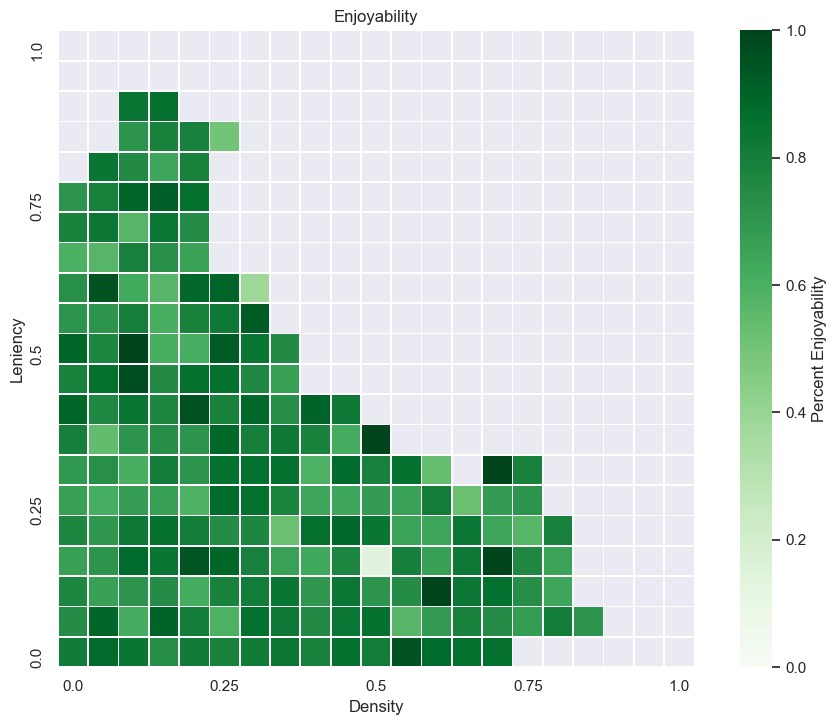

In [7]:
plot(fun_matrix, 'Enjoyability')

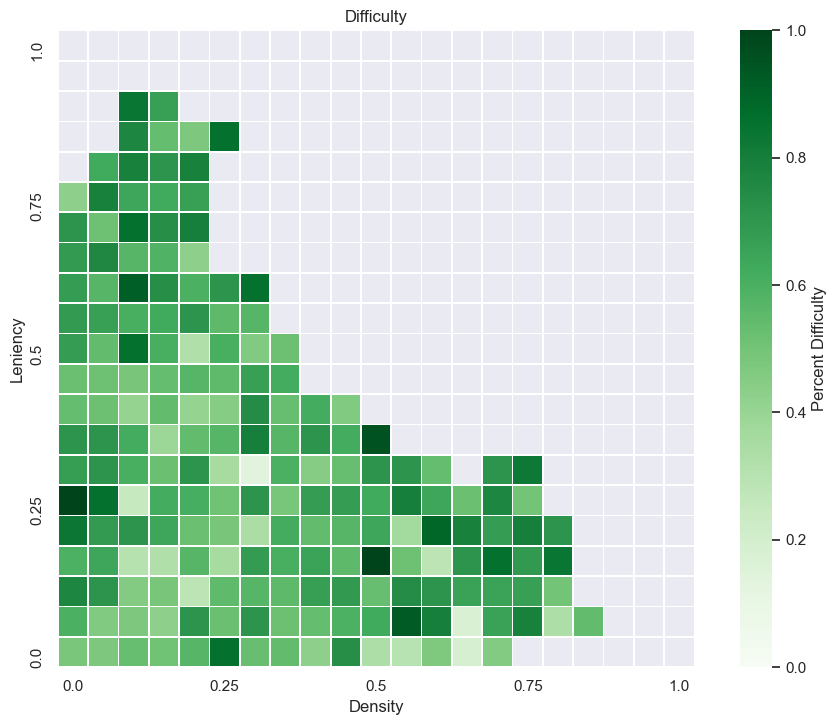

In [8]:
plot(dif_matrix, 'Difficulty')